<a href="https://colab.research.google.com/github/fendiirfan/K-Means-from-Scratch/blob/main/Tubes_Clustering_Fendi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tugas clustering (unsupervised Learning) adalah mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. 

Tugas classification (supervised learning) adalah memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.


SIM	--> 0 : Tidak punya SIM 1 : Punya SIM
Kode_Daerah --> Kode area tempat tinggal pelanggan
Sudah_Asuransi --> 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan
Umur_Kendaraan --> Umur kendaraan
Kendaraan_Rusak --> 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak.
Premi --> Jumlah premi yang harus dibayarkan per tahun.
Kanal_Penjualan --> Kode kanal untuk menghubungi pelanggan (email, telpon, dll)
Lama_Berlangganan	--> Sudah berapa lama pelanggan menjadi klien perusahaan
Tertarik --> 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik

In [40]:
df_train = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/K-Means-from-Scratch/main/kendaraan_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/K-Means-from-Scratch/main/kendaraan_test.csv')

# EDA & Preprocessing

In [41]:
df_training_model = df_train.copy()
df_training_model.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [43]:
for columns in df_training_model.columns:
  if df_training_model[columns].dtypes== 'O':
    print(f'{columns} \n{df_training_model[columns].value_counts()},\n')

Jenis_Kelamin 
Pria      146678
Wanita    124713
Name: Jenis_Kelamin, dtype: int64,

Umur_Kendaraan 
1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64,

Kendaraan_Rusak 
Pernah    137123
Tidak     134520
Name: Kendaraan_Rusak, dtype: int64,



In [44]:
df_training_model.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [45]:
df_training_model = df_training_model.dropna().reset_index()

In [46]:
df_training_model['Tertarik'].value_counts()

0    150270
1     20798
Name: Tertarik, dtype: int64

In [47]:
'''
Mengubah value dari kolom yang berjenis kategori menjadi angka
pada kolom 
'''
df_training_model = df_training_model.replace({'Pria':1,
                                               'Wanita':0,
                                               '< 1 Tahun':0,
                                               '1-2 Tahun':1,
                                               '> 2 Tahun':2,
                                               'Pernah':1,
                                               'Tidak':0
                                               })

In [48]:
df_training_model.head()

,index,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,1,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,3,4,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
3,5,6,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
4,8,9,0,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0


In [49]:
df_training_model.describe()

,index,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000
mean,142793.020729,142794.020729,0.540662,38.818137,0.997931,26.411334,0.459794,0.607998,0.504443,30506.747282,112.260206,154.253063,0.121577
std,82491.716355,82491.716355,0.498345,15.531695,0.045443,13.262377,0.498382,0.567626,0.499982,17090.409733,54.106712,83.862579,0.326798
min,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71349.750000,71350.750000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24369.750000,29.000000,81.000000,0.000000
50%,142767.000000,142768.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31603.000000,140.000000,154.000000,0.000000
75%,214069.250000,214070.250000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39323.250000,152.000000,227.000000,0.000000
max,285830.000000,285831.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [50]:
df_training_model.corr()

,index,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
index,1.000000,1.000000,-0.002391,0.003523,-0.004080,0.000719,-0.003694,0.003093,0.003068,0.002145,-0.001707,0.002600,0.000004
id,1.000000,1.000000,-0.002391,0.003523,-0.004080,0.000719,-0.003694,0.003093,0.003068,0.002145,-0.001707,0.002600,0.000004
Jenis_Kelamin,-0.002391,-0.002391,1.000000,0.145438,-0.018742,0.002656,-0.082809,0.160203,0.092064,0.003023,-0.114058,-0.002175,0.053709
Umur,0.003523,0.003523,0.145438,1.000000,-0.078543,0.044256,-0.256815,0.766604,0.269755,0.063838,-0.576009,-0.001032,0.108912
SIM,-0.004080,-0.004080,-0.018742,-0.078543,1.000000,-0.005862,0.016459,-0.036660,-0.019149,-0.012864,0.041575,0.001739,0.008675
Kode_Daerah,0.000719,0.000719,0.002656,0.044256,-0.005862,1.000000,-0.024393,0.043637,0.026729,-0.012462,-0.043988,-0.003798,0.011152
Sudah_Asuransi,-0.003694,-0.003694,-0.082809,-0.256815,0.016459,-0.024393,1.000000,-0.382045,-0.826157,0.003988,0.221583,0.002902,-0.340711
Umur_Kendaraan,0.003093,0.003093,0.160203,0.766604,-0.036660,0.043637,-0.382045,1.000000,0.398799,0.038098,-0.549524,-0.002030,0.221659
Kendaraan_Rusak,0.003068,0.003068,0.092064,0.269755,-0.019149,0.026729,-0.826157,0.398799,1.000000,0.008673,-0.226667,-0.002023,0.353388
Premi,0.002145,0.002145,0.003023,0.063838,-0.012864,-0.012462,0.003988,0.038098,0.008673,1.000000,-0.112297,-0.001260,0.021890


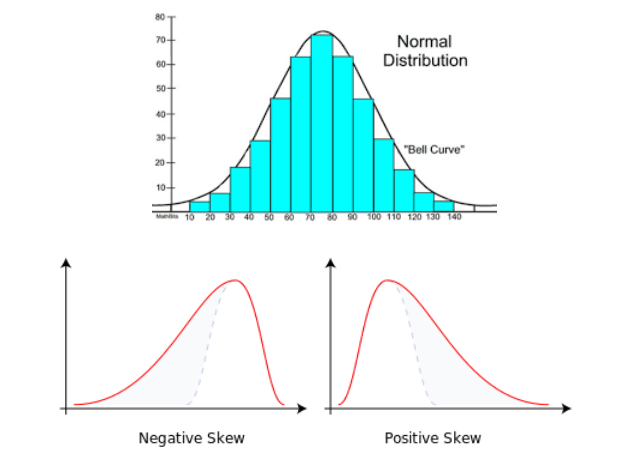

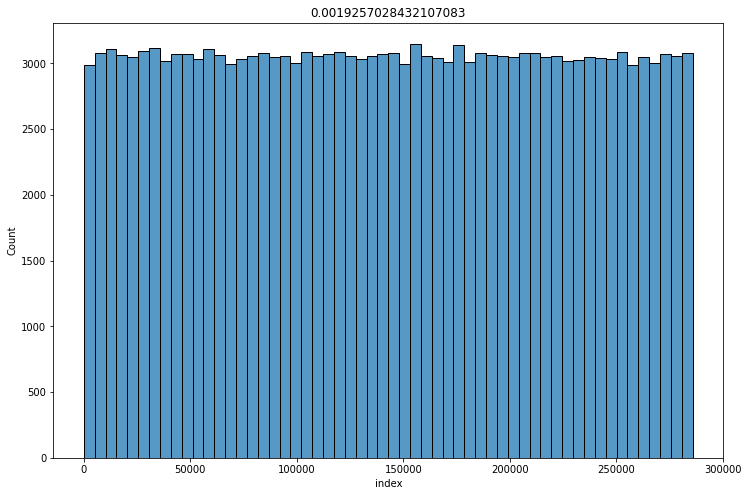

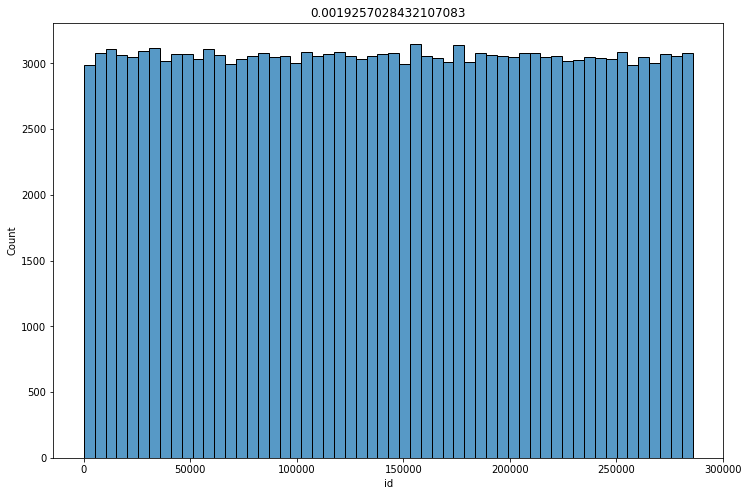

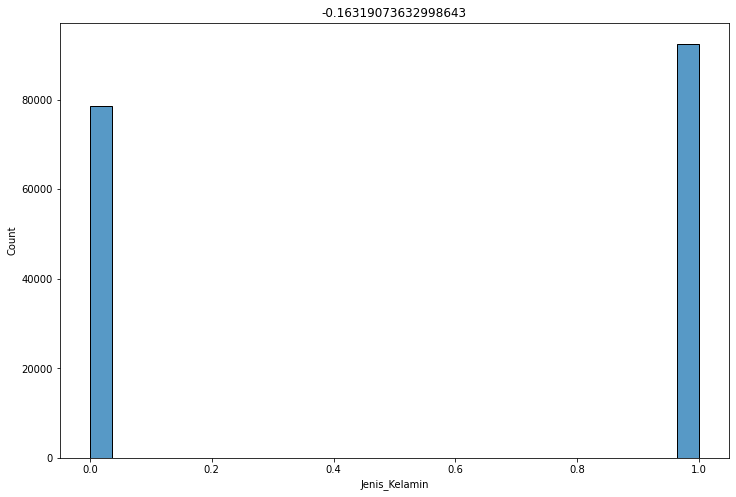

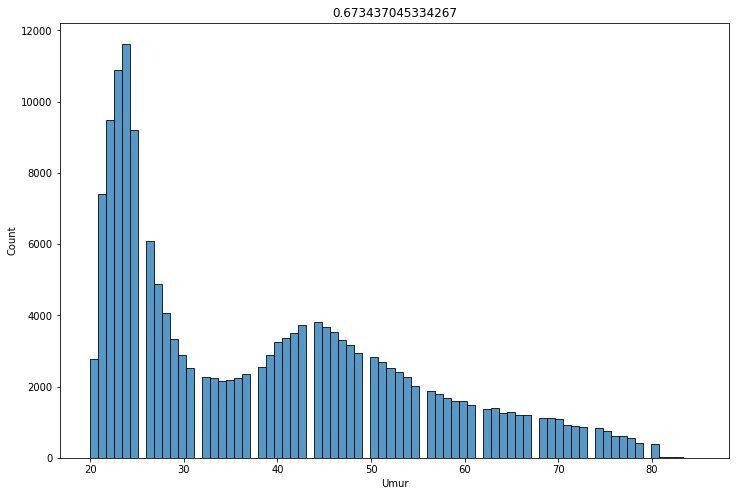

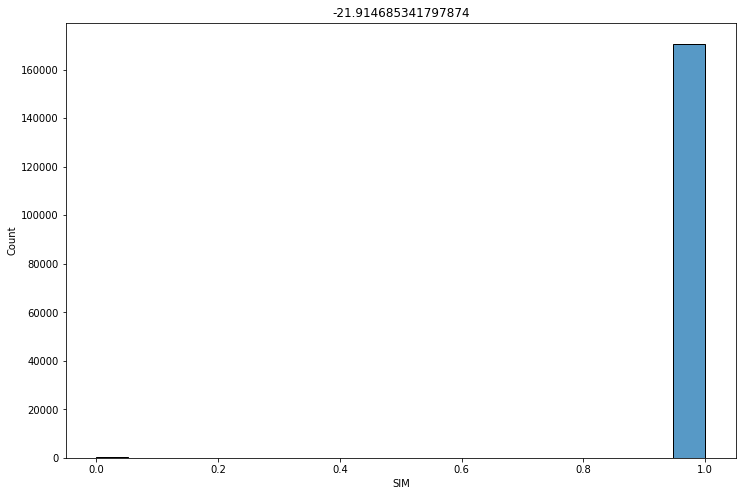

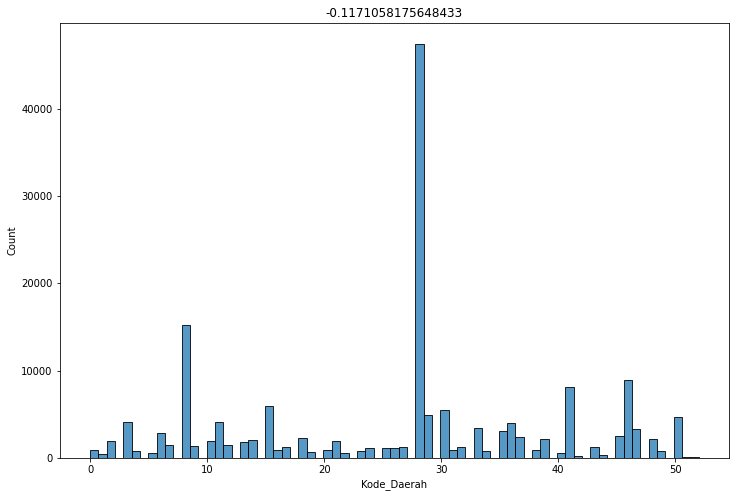

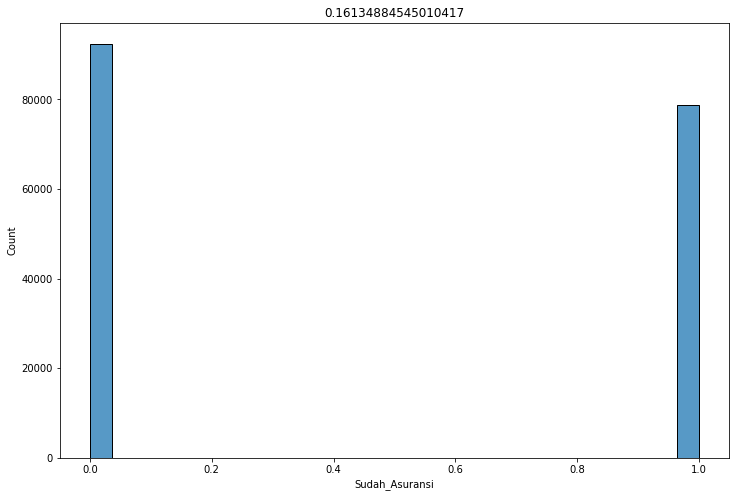

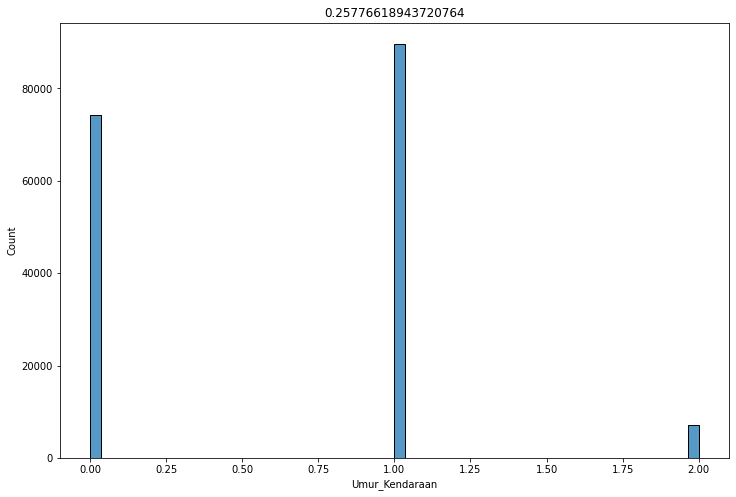

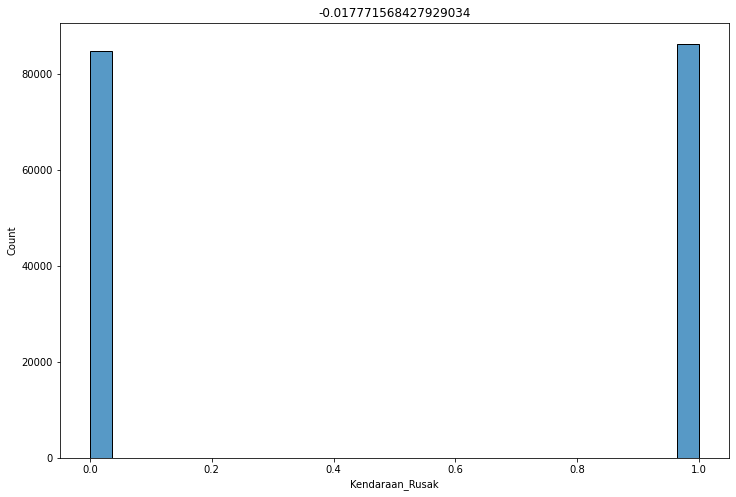

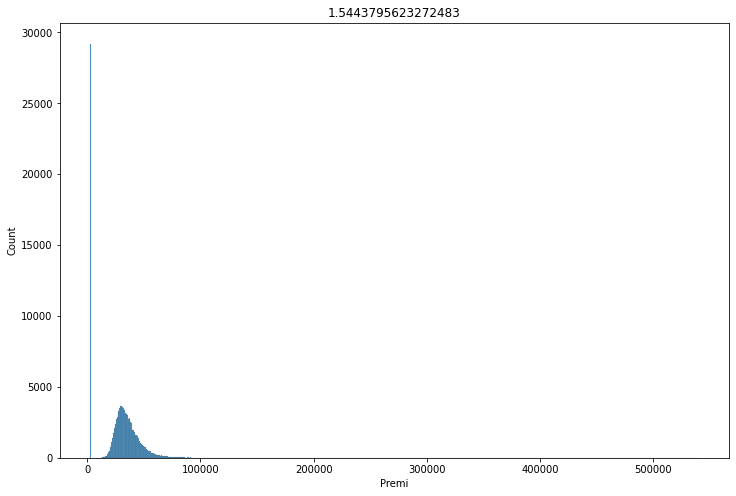

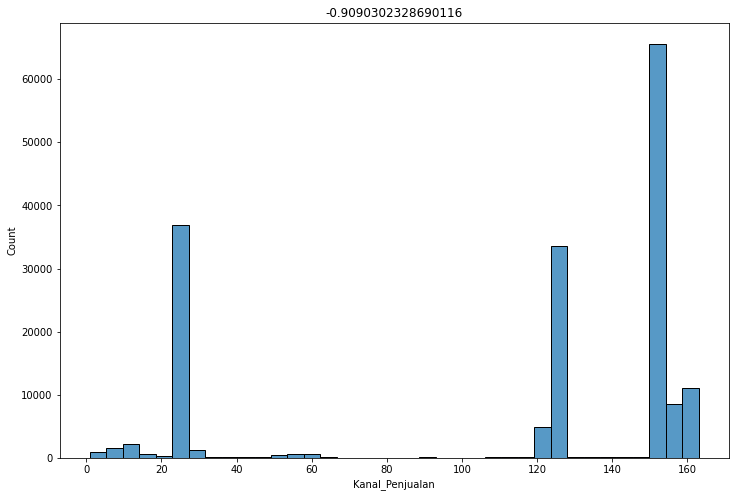

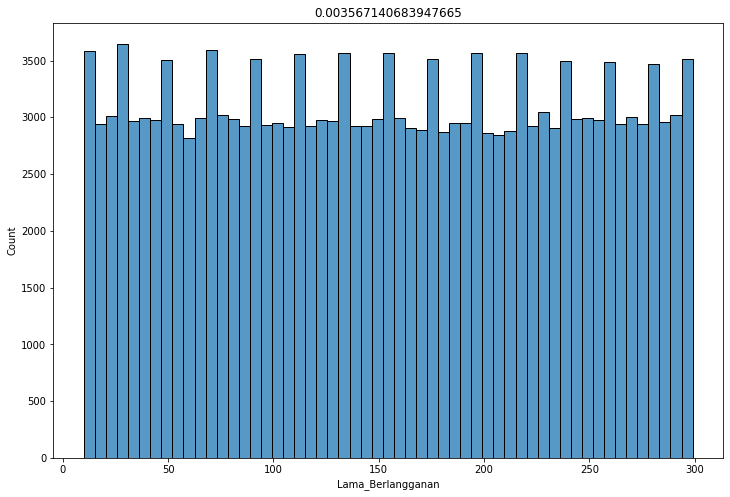

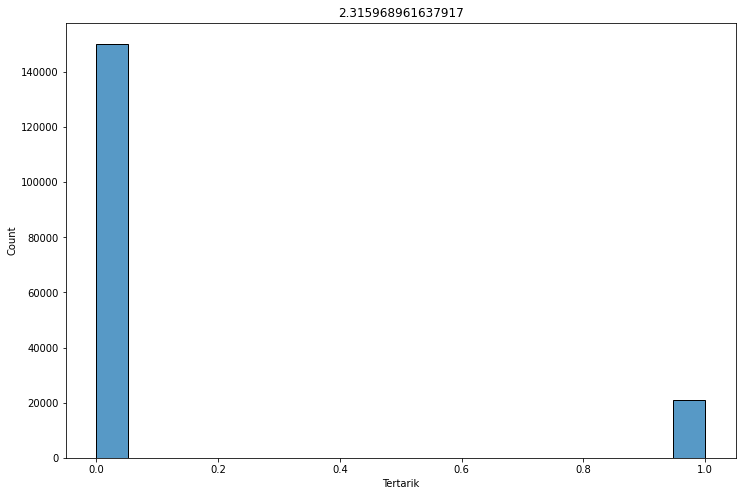

In [51]:
for columnName in df_training_model.columns:
  if columnName != 'Nama Mobil':
    plt.figure(figsize=(12,8))
    plt.title(df_training_model[columnName].skew())
    sns.histplot(data=df_training_model, x=columnName)
    plt.show()

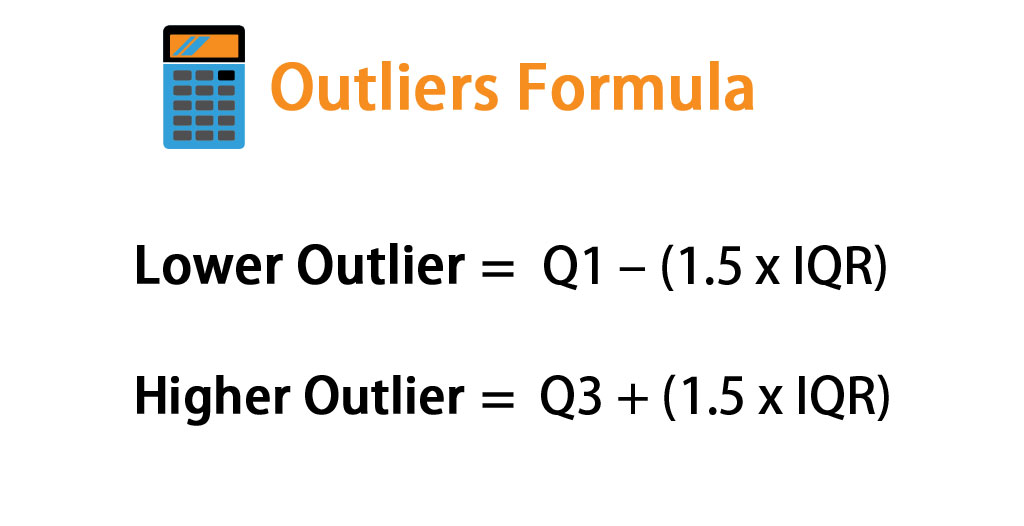

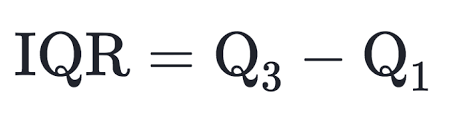

In [52]:
def delete_outlier(df,columns):
  for column in columns:
    q1 = np.quantile(df[column],0.25)
    q3 = np.quantile(df[column],0.75)
    iqr = q3-q1

    lower_outlier = q1 - (1.5*iqr)
    higher_outlier = q3 + (1.5*iqr)

    df = df[(df[column]>=lower_outlier) & (df[column]<=higher_outlier)].reset_index()
  return df

In [53]:
df_training_model_non_outlier = delete_outlier(df_training_model,['Premi'])

In [74]:
pilih_kolom = ['Umur_Kendaraan','Kendaraan_Rusak','Lama_Berlangganan','Sudah_Asuransi','Premi','Umur']

df_X_train = df_training_model[pilih_kolom]
df_y_train = df_training_model['Tertarik']

df_X_train_non_outlier = df_training_model_non_outlier[pilih_kolom]
df_y_train_non_outlier = df_training_model_non_outlier['Tertarik']

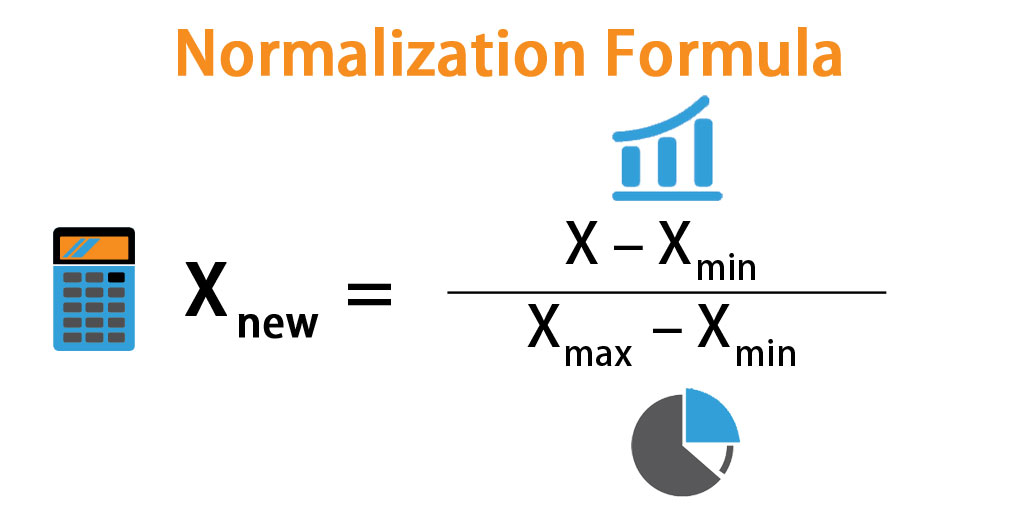

In [75]:
def get_normalization(df):
  # IS : Masukan suatu dataframe dan list inputan dari user
  # FS : Mengembalikan dataframe dan list inputan dari user yang telah dinormalisasi menggunakan rumus min max scaller
  iter = 0
  for column in df.columns: #column untuk mengubah setiap kolom
      xMin = df[column].min() #mendeklarasikan max dari kolom tersebut
      xMax = df[column].max() #mendeklarasikan min dari kolom tersebut

      # norm df
      temp = []
      for i in range(len(df[column])): # looping untuk mengubah setiap bari di suatu kolom
        temp.append((df[column][i]-xMin)/(xMax-xMin))
      df[column] = temp

        
  return df



In [76]:
df_X_train = get_normalization(df_X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## **MODEL**

In [77]:
def euclidean_distance(titik1, titik2):
    return np.sqrt(sum((titik1 - titik2)**2))

In [81]:
def k_means(df,K,epoch):

  df = np.array(df)

  # Inisialisasi centorid
  old_centroid  =  {i : [np.random.choice(df[:,k]) for k in range(len(df[0]))] 
                for i in range(K)}

  # buat new centroid
  new_centroid = old_centroid.copy()

  # iterasi epoch
  epoch_i = 0
  # cek apakah centroid yg lama sama dengan centroid baru jika tidak akan bernilai false
  check =False
  # lakukan training
  while epoch_i <= epoch and check==False:
    
    # print centorid baru
    print(f'Epoch {epoch_i+1}')
    for cent in new_centroid:
      print(f'Centroid {cent} : \n{new_centroid[cent]}')
    print('\n')

    # mendefinisikan cluster dan Label
    clustering = {i: [] for i in range(K)}
    Label = []
    
    # mencari jarak centrodi ke titik
    for titik in df:
      dist = [euclidean_distance(titik, new_centroid[cent]) for cent in new_centroid]
      clustering[np.argmin(dist)].append(list(titik))
      Label.append(np.argmin(dist))
    # menentukan centroid baru
    old_centroid = new_centroid.copy()
    for cl in clustering:
      new_centroid[cl] = np.mean(clustering[cl], axis=0)

    
    # buat kondisi dimana jika centroid sebelumnya sama dengan centroid sekarang maka diberhentikan
    for cent in old_centroid.keys():
      if list(new_centroid.get(cent)) == list(old_centroid.get(cent)):
        check = True
    
    # tambah 1 epoch_i
    epoch_i = epoch_i + 1

  return Label

In [82]:
Label = k_means(df_X_train,K=2,epoch=100)

Epoch 1
Centroid 0 : 
[0.5, 0.0, 0.7024221453287197, 0.0, 0.055352674709553795, 0.015384615384615385]
Centroid 1 : 
[0.5, 1.0, 0.12110726643598616, 1.0, 0.05855246635102831, 0.27692307692307694]


Epoch 2
Centroid 0 : 
[0.26137586 0.43776558 0.70204331 0.44726403 0.05123513 0.24478333]
Centroid 1 : 
[0.35361087 0.58205255 0.26297946 0.47437795 0.05258806 0.34156987]


Epoch 3
Centroid 0 : 
[0.22028357 0.33514965 0.70121305 0.59494652 0.05134247 0.22783   ]
Centroid 1 : 
[0.39480258 0.68806971 0.27996904 0.31319766 0.05242205 0.35641201]


Epoch 4
Centroid 0 : 
[0.18189131 0.02543044 0.51868224 0.91555604 0.05159045 0.21774737]
Centroid 1 : 
[0.41985259 0.95892096 0.48060948 0.02737463 0.05211641 0.3575967 ]


Epoch 5
Centroid 0 : 
[0.16805696 0.02155673 0.50240556 0.92773306 0.05145522 0.20604734]
Centroid 1 : 
[0.42879326 0.94773015 0.49615287 0.03022727 0.05223224 0.36612801]


Epoch 6
Centroid 0 : 
[0.16471749 0.02171231 0.50030508 0.93702196 0.05154211 0.20583708]
Centroid 1 : 
[0.

In [83]:
Label_non_outlier = k_means(df_X_train_non_outlier,K=2,epoch=100)

Epoch 1
Centroid 0 : 
[0.0, 1.0, 39.0, 1.0, 38744.0, 22.0]
Centroid 1 : 
[0.0, 0.0, 31.0, 0.0, 2630.0, 46.0]


Epoch 2
Centroid 0 : 
[5.83571375e-01 4.88693636e-01 1.54391034e+02 4.78292081e-01
 3.52927363e+04 3.83167203e+01]
Centroid 1 : 
[6.84228250e-01 5.61042062e-01 1.53976214e+02 3.90773281e-01
 4.32893972e+03 4.01000122e+01]


Epoch 3
Centroid 0 : 
[5.81787571e-01 4.87729083e-01 1.54362647e+02 4.79318554e-01
 3.51700373e+04 3.82722000e+01]
Centroid 1 : 
[6.95358783e-01 5.67685728e-01 1.54083003e+02 3.83335973e-01
 3.77302306e+03 4.03523840e+01]


Epoch 4
Centroid 0 : 
[5.81290738e-01 4.87433691e-01 1.54367808e+02 4.79532120e-01
 3.51319251e+04 3.82581032e+01]
Centroid 1 : 
[6.98716102e-01 5.69813979e-01 1.54057695e+02 3.81391477e-01
 3.60421256e+03 4.04355009e+01]


Epoch 5
Centroid 0 : 
[5.81176488e-01 4.87384210e-01 1.54369351e+02 4.79584821e-01
 3.51198429e+04 3.82542527e+01]
Centroid 1 : 
[6.99604870e-01 5.70304218e-01 1.54049953e+02 3.80834592e-01
 3.55138231e+03 4.04595072e

In [84]:
df_y_train[:20]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: Tertarik, dtype: int64

In [85]:
Label[:20]

[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [86]:
Label_non_outlier[:20]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [91]:
# ubah_label = pd.DataFrame(data={'label':Label}).replace({1:0,0:1})['label']

# **TEST**

In [88]:
from sklearn.metrics import classification_report
print(classification_report(df_y_train_non_outlier,Label_non_outlier))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85    146263
           1       0.13      0.20      0.15     20133

    accuracy                           0.74    166396
   macro avg       0.50      0.51      0.50    166396
weighted avg       0.79      0.74      0.76    166396



In [94]:
print(classification_report(df_y_train,Label))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70    150270
           1       0.23      0.99      0.37     20798

    accuracy                           0.59    171068
   macro avg       0.61      0.76      0.54    171068
weighted avg       0.90      0.59      0.66    171068



# **VISUALISASi**

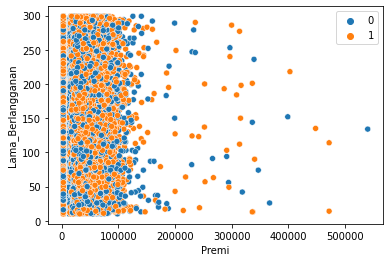

In [95]:
sns.scatterplot(data=df_training_model, x="Premi", y="Lama_Berlangganan", hue=Label)

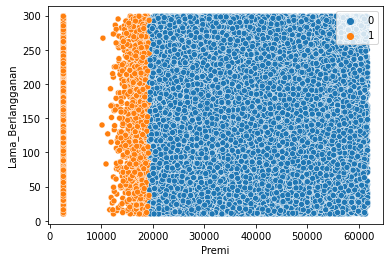

In [96]:
sns.scatterplot(data=df_X_train_non_outlier, x="Premi", y="Lama_Berlangganan", hue=Label_non_outlier)

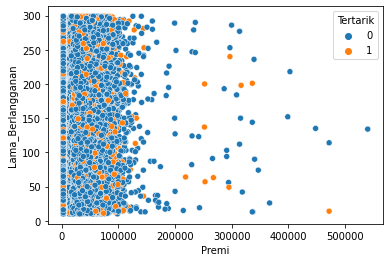

In [97]:
sns.scatterplot(data=df_training_model, x="Premi", y="Lama_Berlangganan", hue=df_y_train)